<a href="https://colab.research.google.com/github/Riti13/EV_Market-1-/blob/main/EV_Market(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [12]:
cars=pd.read_csv('/content/Cars 1.csv')
cars.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [4]:
electric_car=pd.read_csv('/content/Electric Car.csv')
electric_car.sort_values('TopSpeed_KmH',ascending=False).head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
51,Tesla,Roadster,2.1,410,970,206,920,Yes,AWD,Type 2 CCS,Cabrio,S,4,215000
59,Tesla,Model S Performance,2.5,261,505,188,550,Yes,AWD,Type 2,Liftback,F,5,96990
24,Tesla,Model 3 Long Range Performance,3.4,261,435,167,910,Yes,AWD,Type 2 CCS,Sedan,D,5,61480
16,Porsche,Taycan Turbo S,2.8,260,375,223,780,Yes,AWD,Type 2 CCS,Sedan,F,4,180781
79,Porsche,Taycan Turbo,3.2,260,390,215,810,Yes,AWD,Type 2 CCS,Sedan,F,4,148301


In [5]:
cars1=cars['Engine Information.Engine Type'].str.split(' ',n=1,expand=True)
cars["Brand"]=cars1[0]

In [6]:
df=cars.pop('Brand')
cars.insert(0,'Brand',df)
cars.head(5)

,Brand,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,Audi,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,Audi,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,Audi,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,Audi,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,Audi,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


Text(0, 0.5, 'Acceleration from 0-100 in sec')

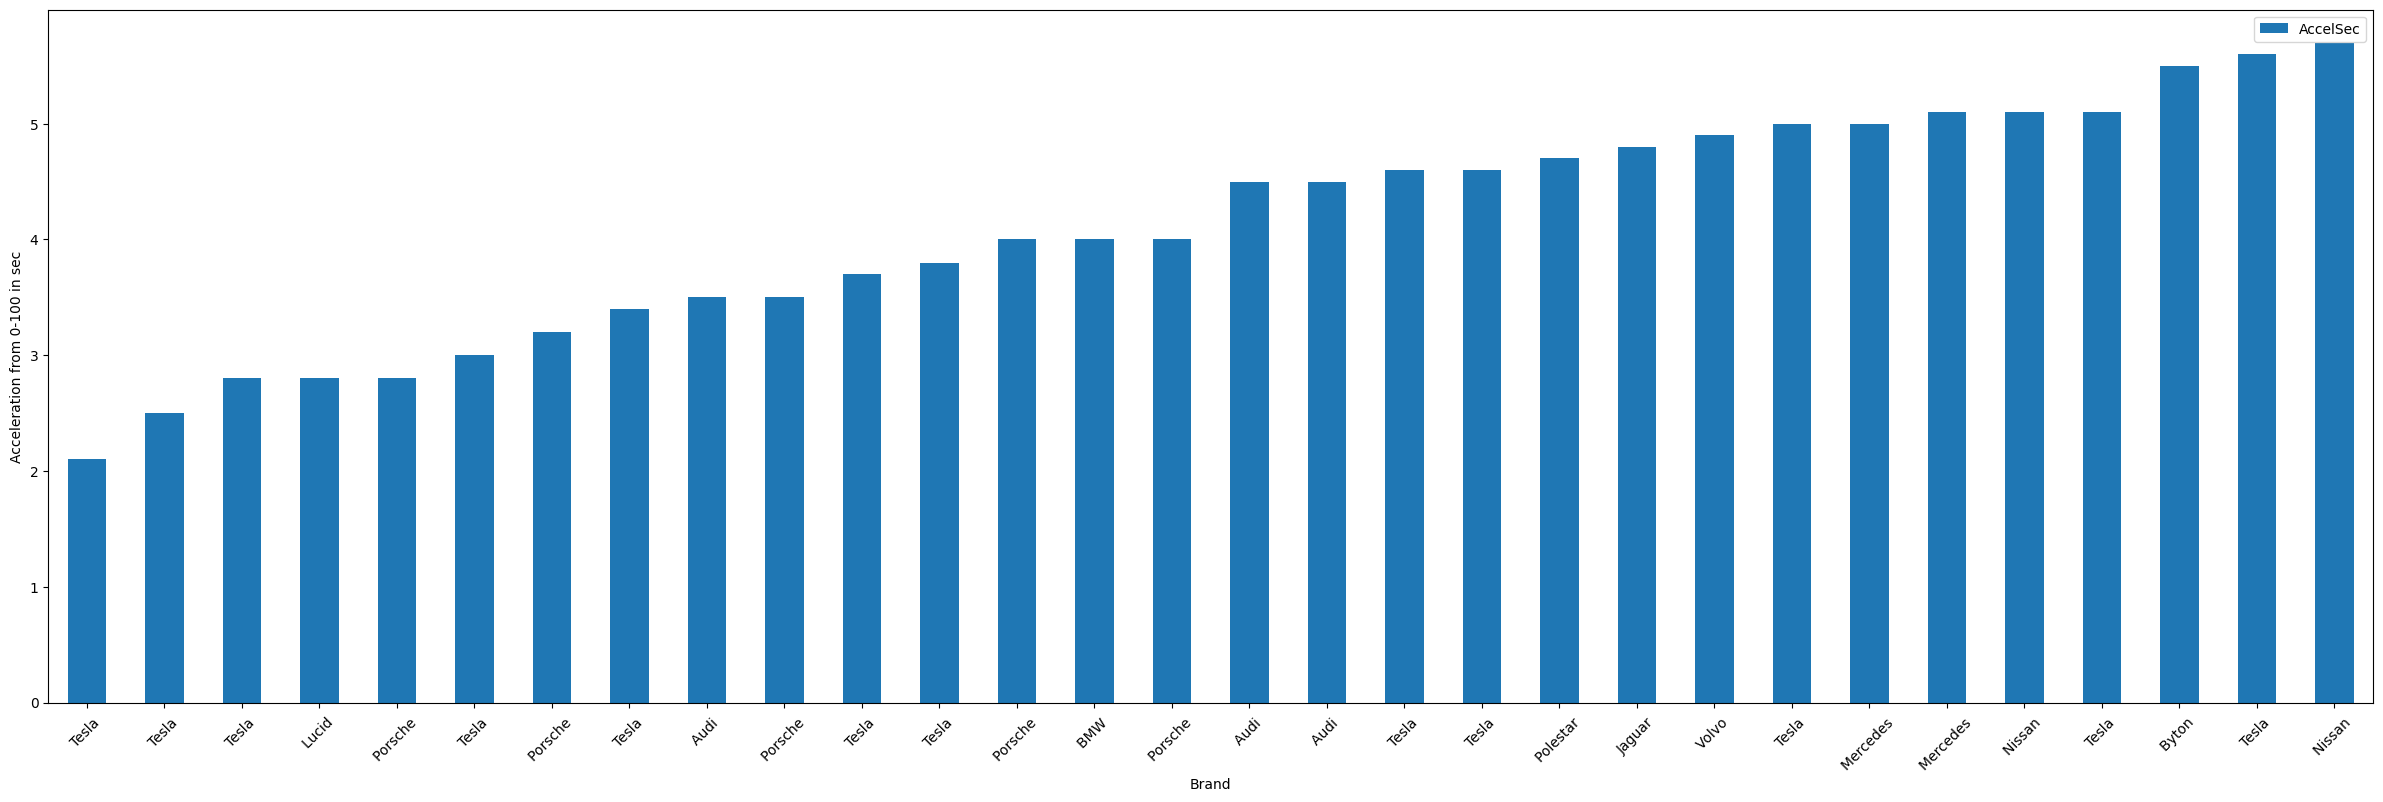

In [13]:
accel_sort=electric_car.sort_values('AccelSec').head(30)
fig, ax = plt.subplots(figsize=(30,9))
accel_sort.plot(kind='bar',x='Brand',y='AccelSec',ax=ax)
plt.tick_params(axis ='x', rotation = 45)
plt.ylabel('Acceleration from 0-100 in sec')

In [14]:
cars['top_speed']=cars['Engine Information.Engine Statistics.Horsepower']*0.5
cars.sort_values('top_speed',ascending=False).head(10)

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,top_speed
1317,212,123,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 638 hp 604 ft-lbs S-...,True,6,6 Speed Manual,14,Gasoline,21,Manual transmission,2012 Chevrolet Corvette ZR1 3ZR,Chevrolet,2012 Chevrolet Corvette ZR1,2012,638,604,319.0
1316,212,123,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 638 hp 604 ft-lbs S-...,True,6,6 Speed Manual,14,Gasoline,21,Manual transmission,2012 Chevrolet Corvette ZR1 1ZR,Chevrolet,2012 Chevrolet Corvette ZR1,2012,638,604,319.0
1321,212,123,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 638 hp 604 ft-lbs S-...,True,6,6 Speed Manual,14,Gasoline,20,Manual transmission,2010 Chevrolet Corvette ZR1 3ZR,Chevrolet,2010 Chevrolet Corvette ZR1,2010,638,604,319.0
1319,212,123,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 638 hp 604 ft-lbs S-...,True,6,6 Speed Manual,14,Gasoline,20,Manual transmission,2011 Chevrolet Corvette ZR1 3ZR,Chevrolet,2011 Chevrolet Corvette ZR1,2011,638,604,319.0
1318,212,123,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 638 hp 604 ft-lbs S-...,True,6,6 Speed Manual,14,Gasoline,20,Manual transmission,2011 Chevrolet Corvette ZR1 1ZR,Chevrolet,2011 Chevrolet Corvette ZR1,2011,638,604,319.0
1320,212,123,135,Rear-wheel drive,Chevrolet 6.2L 8 Cylinder 638 hp 604 ft-lbs S-...,True,6,6 Speed Manual,14,Gasoline,20,Manual transmission,2010 Chevrolet Corvette ZR1 1ZR,Chevrolet,2010 Chevrolet Corvette ZR1,2010,638,604,319.0
358,38,20,189,Rear-wheel drive,Maybach 6.0L 12 Cylinder 631 hp 738 ft-lbs Turbo,True,5,5 Speed Automatic Select Shift,10,Gasoline,16,Automatic transmission,2010 Maybach 62 Zeppelin,Maybach,2010 Maybach 62,2010,631,738,315.5
351,38,95,189,Rear-wheel drive,Maybach 6.0L 12 Cylinder 631 hp 738 ft-lbs Turbo,True,5,5 Speed Automatic Select Shift,10,Gasoline,16,Automatic transmission,2010 Maybach 57 Zeppelin,Maybach,2010 Maybach 57,2010,631,738,315.5
354,38,95,189,Rear-wheel drive,Maybach 6.0L 12 Cylinder 631 hp 738 ft-lbs Turbo,True,5,5 Speed Automatic Select Shift,10,Gasoline,16,Automatic transmission,2010 Maybach 57 Zeppelin,Maybach,2010 Maybach 57,2011,631,738,315.5
1138,137,200,79,Rear-wheel drive,Mercedes-AMG 6.0L 12 Cylinder 621hp 738ft-lbs ...,True,5,5 Speed Automatic Select Shift,12,Gasoline,18,Automatic transmission,2011 Mercedes-Benz CL65 AMG,AMG,2011 Mercedes-Benz CL-Class,2011,621,738,310.5


In [15]:
def discover(df, target=''):

    #Creating Seris with Feature Types, removing the target feature
    if target != '':
        df1 = df.drop(target, axis = 1, inplace = False)
    else:
        df1 = df

    #listing feature type
    feature_type = []
    for j in range(len(df1.columns)):
        if df1[df1.columns[j]].nunique()==2:
            feature_type.append('Binary')
        elif df1[df1.columns[j]].dtypes != 'O' and df1[df1.columns[j]].nunique()>10:
            feature_type.append('Numerical')
        elif df1[df1.columns[j]].dtypes != 'O' and df1[df1.columns[j]].nunique()<10:
            feature_type.append('Ordinal')
        elif df1[df1.columns[j]].nunique()<10:
            feature_type.append('Ordinal')
        else:
            feature_type.append('Identifier')

    #listing feature content
    features_content = []
    for i in range(len(df1.columns)):
        if df1[df1.columns[i]].nunique()<10:
            features_content.append(df1[df1.columns[i]].unique())
        else:
            features_content.append('n = ' + str(df1[df1.columns[i]].nunique()))

    #listing empty cells feature type
    num_of_empty = []
    for k in df1.columns:
        num_of_empty.append(df1[k].isnull().sum())

    #listing empty cells ratio feature type
    ratio_of_empty = []
    for k in df1.columns:
        ratio_of_empty.append(round(100*df1[k].isnull().sum()/df1[k].isnull().count(),2))
    discovered = pd.DataFrame({'Features': df1.columns,
                               'Features Content': features_content,
                               'Feature Type': feature_type,
                               'Empty Cells': num_of_empty,
                               '% Empty': ratio_of_empty
                             })
    discovered = discovered.sort_values(['Feature Type','Empty Cells'],ascending=False)
    print("Shape of Dataset: ",df.shape)
    return discovered

In [16]:
discover(electric_car)

Shape of Dataset:  (103, 14)


,Features,Features Content,Feature Type,Empty Cells,% Empty
8,PowerTrain,"[AWD, RWD, FWD]",Ordinal,0,0.0
9,PlugType,"[Type 2 CCS, Type 2 CHAdeMO, Type 2, Type 1 CH...",Ordinal,0,0.0
10,BodyStyle,"[Sedan, Hatchback, Liftback, SUV, Pickup, MPV,...",Ordinal,0,0.0
11,Segment,"[D, C, B, F, A, E, N, S]",Ordinal,0,0.0
12,Seats,"[5, 4, 7, 6, 2]",Ordinal,0,0.0
2,AccelSec,n = 55,Numerical,0,0.0
3,TopSpeed_KmH,n = 25,Numerical,0,0.0
4,Range_Km,n = 50,Numerical,0,0.0
5,Efficiency_WhKm,n = 54,Numerical,0,0.0
13,PriceEuro,n = 87,Numerical,0,0.0


In [17]:
electric_car.replace({'PlugType':{'Type 2 CCS':3, 'Type 2 CHAdeMO':4, 'Type 2':2, 'Type 1 CHAdeMO':1},
                      'BodyStyle':{'Sedan':1, 'Hatchback':2, 'Liftback':3, 'SUV':4, 'Pickup':5, 'MPV':6, 'Cabrio':7,'SPV':8, 'Station':9},
                      'Segment':{'D':4, 'C':3, 'B':2, 'F':6, 'A':1, 'E':5, 'N':7, 'S':8},
                      'RapidCharge':{'Yes':1,'No':0},
                      'PowerTrain':{'AWD':3,'RWD':1,'FWD':2},
                     'FastCharge_KmH':{'-':0}},inplace=True)

In [18]:
electric_car['FastCharge_KmH']=electric_car['FastCharge_KmH'].astype(int)
X=electric_car.select_dtypes(include=('int','float'))
from scipy.stats import zscore
X = X.apply(zscore)
X

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,-0.931186,1.240881,0.886862,-0.957247,2.312248,0.225877,1.075633,0.201008,-1.406354,0.224027,0.147109,-0.009761
1,0.867167,-0.442660,-0.548531,-0.753325,-0.844330,0.225877,-1.471268,0.201008,-0.805298,-0.367634,0.147109,-0.759866
2,-0.897883,0.710450,0.488142,-0.277506,0.848328,0.225877,1.075633,0.201008,-0.204242,0.224027,0.147109,0.018501
3,-0.198524,0.018584,0.169166,0.572171,0.573843,0.225877,-1.471268,0.201008,0.396814,0.224027,0.147109,0.359993
4,0.700653,-0.788593,-1.345971,-0.719338,-1.118815,0.225877,-1.471268,0.201008,-0.805298,-0.959295,-1.115578,-0.671638
...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.034596,-0.442660,-0.070066,0.062365,0.024872,0.225877,-0.197818,0.201008,-0.805298,-0.367634,0.147109,-0.318281
99,-0.964489,0.710450,-0.030194,2.339498,0.482347,0.225877,1.075633,0.201008,0.396814,0.815688,0.147109,1.184579
100,-0.498249,0.479828,-0.109938,0.164326,0.024872,0.225877,1.075633,0.201008,-0.805298,-0.367634,0.147109,-0.171087
101,-0.764672,0.479828,0.288782,1.455834,0.070620,0.225877,1.075633,0.201008,-0.805298,-0.367634,0.147109,0.270498


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

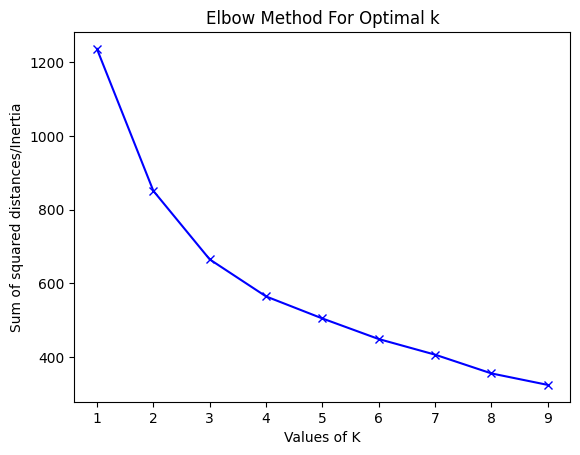

In [19]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
     kmeans = KMeans(n_clusters=num_clusters)
     kmeans.fit(X)
     Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

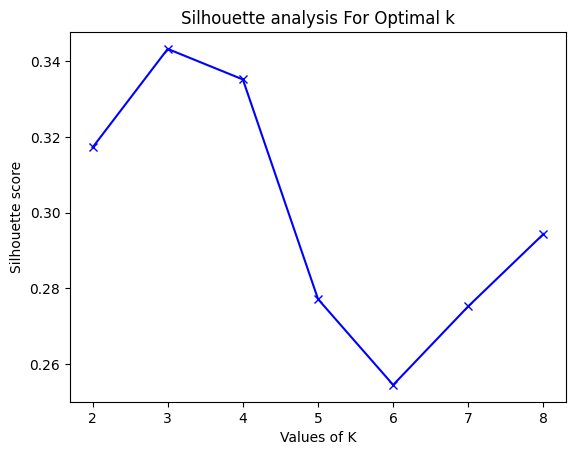

In [20]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:

 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [21]:
kmeans=KMeans(n_clusters=3,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
X['cluster']=kmeans.fit_predict(X)
centroids=kmeans.cluster_centers_
cen_X=[i[0] for i in centroids]
cen_y=[i[1]for i in centroids]

X['cen_X']=X.cluster.map({0:cen_X[0], 1:cen_X[1], 2:cen_X[2]})
X['cen_y']=X.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF']
X['c']=X.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

In [22]:
kmeans.cluster_centers_.shape
cen_X,cen_y
electric_car

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,3,3,1,4,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,1,3,2,3,5,30000
2,Polestar,2,4.7,210,400,181,620,1,3,3,3,4,5,56440
3,BMW,iX3,6.8,180,360,206,560,1,1,3,4,4,5,68040
4,Honda,e,9.5,145,170,168,190,1,1,3,2,2,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,2,3,2,3,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,3,3,4,5,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,3,3,2,3,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,3,3,2,3,5,65000


Text(0, 0.5, 'Acclelration per 10 sec')

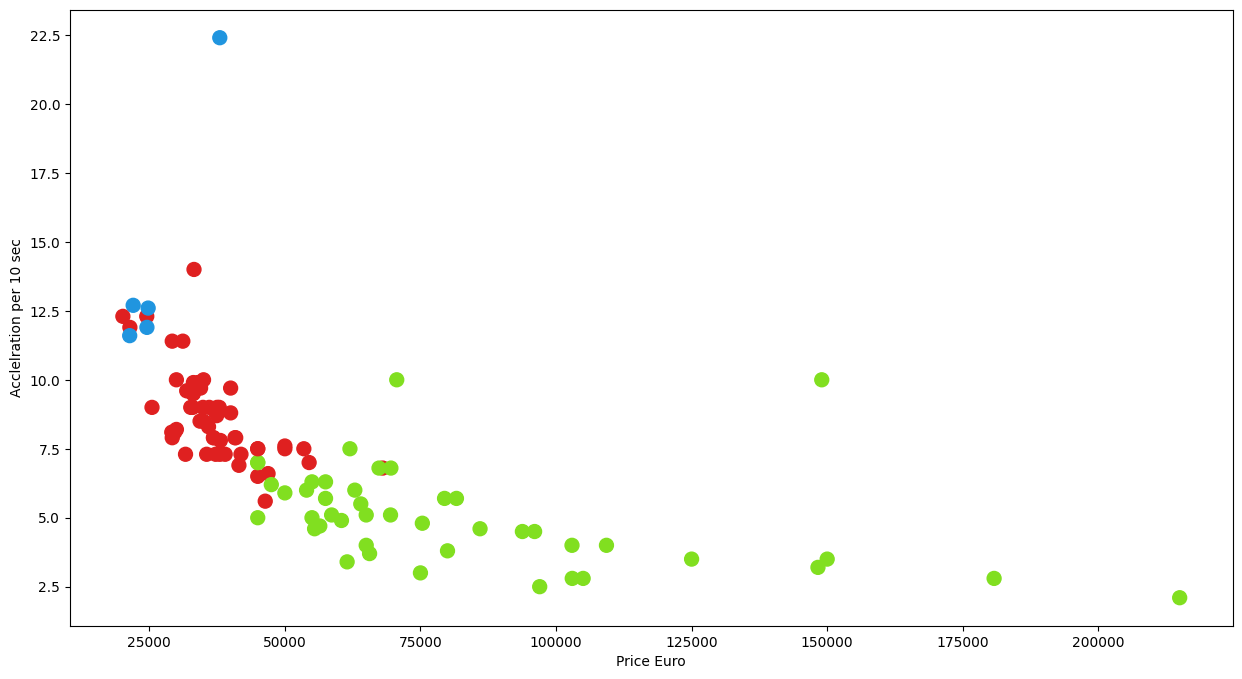

In [23]:
result=['cluster','cen_X','cen_y','c']
electric_car[result]=X[result]
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(x=electric_car.PriceEuro,y=electric_car.AccelSec,c=electric_car.c,s=100)
plt.xlabel('Price Euro')
plt.ylabel('Acclelration per 10 sec')

Text(0, 0.5, 'Acclelration per 10 sec')

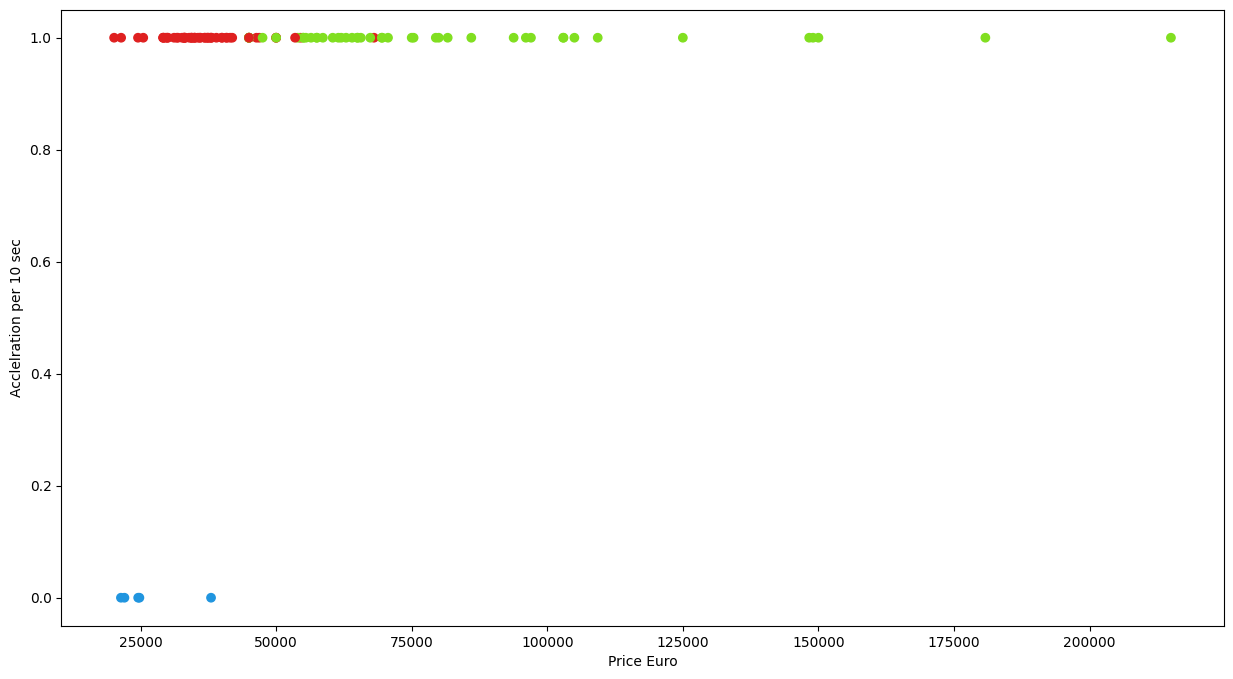

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
plt.scatter(x=electric_car.PriceEuro,y=electric_car.RapidCharge,c=electric_car.c)
plt.xlabel('Price Euro')
plt.ylabel('Acclelration per 10 sec')

In [25]:
data=X.groupby('cluster',as_index=False).sum()
data

<ipython-input-25-3aa0a88ecc23>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data=X.groupby('cluster',as_index=False).sum()


,cluster,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,cen_X,cen_y
0,0,23.248615,-29.692248,-21.008295,-26.914784,-23.909512,12.197357,-34.877698,13.442381,-6.821692,-30.502133,-4.682976,-29.853501,23.248615,-29.692248
1,1,-34.644652,35.249567,29.891238,29.253951,33.849601,9.938587,40.960586,-1.507557,4.236568,34.706947,14.048929,34.218885,-34.644652,35.249567
2,2,11.396037,-5.557319,-8.882943,-2.339168,-9.940089,-22.135944,-6.082888,-11.934824,2.585124,-4.204814,-9.365953,-4.365384,11.396037,-5.557319
